
# PFM: Building Machine Learning Models

## **1. Importar librerías y datos**

In [302]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Librerias pickle y csv
import pickle
import csv


from sklearn import preprocessing, model_selection, metrics

In [303]:
#Cargamos los datasets y las definiciones de las variables para tenerlas a mano

def load_obj(name ):
       with open('obj/' + name + '.pkl', 'rb') as f:
           return pickle.load(f)

df_REE=load_obj('df_Tenerife_Electricity_full_2019_clean+EDA');
dict_REE=load_obj('dict_descripcion_df_Electricity');
df_Meteo=load_obj('df_Tenerife_Meteo_28.14_-16.46_full_2019_clean+EDA');
dict_Meteo=load_obj('dict_descripcion_df_Meteo');

## **2. Combinar los datasets**

En este apartado se combinan los datasets de manera que tengamos un único conjunto de datos, facilitando así la manipulación de estos y la construcción de los modelos. Este paso es importante para evitar errores y confusiones más adelante.


In [304]:
#Eliminamos los atributos 'Month', 'Weekday' y 'Season' de uno de los datasets para evitar que queden duplicados al hacer la combinación de los dos conjuntos de datos.

df_REE=df_REE.drop(['Month','Weekday','Season'], axis=1)
df_REE.head()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,Precio_generacion_€MWh,Aportacion_renovable_%
time_series,,,,,,,,,,,,
2019-01-01 00:00:00,347.6,0.0,347.6,0.0,173.2,159.0,0.0,0.0,15.4,343.4,156.18,0.000000
2019-01-01 00:10:00,345.0,0.0,345.0,0.0,176.2,152.8,0.0,0.0,16.0,343.4,156.18,0.000000
2019-01-01 00:20:00,346.9,0.1,347.0,0.0,174.9,155.9,0.1,0.0,16.1,343.4,156.18,0.028818
2019-01-01 00:30:00,344.5,0.2,344.7,0.0,173.8,155.4,0.2,0.0,15.3,343.4,156.18,0.058021
2019-01-01 00:40:00,342.9,0.1,343.0,0.0,175.8,151.6,0.1,0.0,15.5,343.4,156.18,0.029155


In [305]:
#Unimos los datasets  mediante .join()
#Esta función combina los datasets de acuerdo al índice del dataset principal (left)
df_ML=df_REE.join(df_Meteo)
df_ML.head()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,...,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º,Month,Weekday,Season
2019-01-01 00:00:00,347.6,0.0,347.6,0.0,173.2,159.0,0.0,0.0,15.4,343.4,...,7.5,0.0,8.2,54.6,119.0,3.5,163.0,1,2,Invierno
2019-01-01 00:10:00,345.0,0.0,345.0,0.0,176.2,152.8,0.0,0.0,16.0,343.4,...,7.4,0.0,8.2,54.4,118.0,3.5,165.0,1,2,Invierno
2019-01-01 00:20:00,346.9,0.1,347.0,0.0,174.9,155.9,0.1,0.0,16.1,343.4,...,7.7,0.0,8.1,54.8,117.0,3.5,167.0,1,2,Invierno
2019-01-01 00:30:00,344.5,0.2,344.7,0.0,173.8,155.4,0.2,0.0,15.3,343.4,...,8.0,0.0,8.1,55.4,115.0,3.6,169.0,1,2,Invierno
2019-01-01 00:40:00,342.9,0.1,343.0,0.0,175.8,151.6,0.1,0.0,15.5,343.4,...,8.2,0.0,8.0,55.9,114.0,3.6,171.0,1,2,Invierno


In [306]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52522 entries, 2019-01-01 00:00:00 to 2019-12-31 23:50:00
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Generacion_no_renovable_MW  52522 non-null  float64
 1   Generacion_renovable_MW     52522 non-null  float64
 2   Demanda_real_MW             52522 non-null  float64
 3   Generacion_FV_MW            52522 non-null  float64
 4   Generacion_TV_MW            52522 non-null  float64
 5   Generacion_CC_MW            52522 non-null  float64
 6   Generacion_EO_MW            52522 non-null  float64
 7   Generacion_TG_MW            52522 non-null  float64
 8   Generacion_MD_MW            52522 non-null  float64
 9   Demanda_programada_MW       52522 non-null  float64
 10  Precio_generacion_€MWh      52522 non-null  float64
 11  Aportacion_renovable_%      52522 non-null  float64
 12  Temp_Aire_ºC                52522 non-null  float64
 

In [307]:
df_ML.describe()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,...,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º,Month,Weekday
count,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,...,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000
mean,330.727111,78.416148,409.143252,21.609013,123.647871,173.689606,56.807134,11.936868,21.452770,409.627204,...,6.591025,12.647803,243.694090,16.121736,69.674243,68.715414,5.917136,89.770192,6.524485,3.992536
std,82.004362,67.872114,79.170377,29.825503,45.359021,52.539022,53.238873,17.667290,13.804189,78.815017,...,14.328706,2.655771,322.729937,4.955958,12.977682,81.423938,2.538489,41.727244,3.448432,1.999139
min,91.000000,0.000000,179.600000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,262.900000,...,0.000000,-3.500000,0.000000,4.700000,21.100000,0.000000,0.000000,5.000000,1.000000,1.000000
25%,273.400000,16.500000,328.800000,0.000000,93.100000,143.700000,6.500000,0.000000,14.700000,330.500000,...,0.000000,11.500000,0.000000,12.900000,63.300000,30.000000,4.200000,54.000000,4.000000,2.000000
50%,324.600000,64.200000,431.200000,0.000000,122.800000,163.200000,41.000000,0.000000,18.800000,432.400000,...,0.000000,12.900000,5.000000,15.600000,72.300000,41.000000,6.100000,90.000000,7.000000,4.000000
75%,393.500000,127.400000,477.100000,43.600000,162.100000,202.300000,101.700000,20.700000,34.900000,478.200000,...,3.800000,14.300000,480.000000,18.400000,79.100000,57.000000,7.700000,125.000000,10.000000,6.000000
max,550.900000,265.600000,572.500000,99.800000,211.700000,396.000000,181.900000,206.500000,40.600000,570.900000,...,99.100000,18.900000,1090.000000,40.500000,95.600000,360.000000,14.300000,175.000000,12.000000,7.000000


Algunas preguntas que me vienen a la cabeza:

- ¿Eliminamos el atributo 'Aportacion_renovable_%'?
- ¿Puede ser interesante introducir una columna con la hora?
- ¿Separamos el dataset de info en real time del dataset de info day-ahead?
- ¿Hay que cambiar el formato de la columna 'Season'? ¿One Hot Encoding?
- Hay muchos atributos ¿Aplicamos featuring selection?
- Los atributos presentan diferentes unidades ¿Escalado de variables?
- Recordamos que las distribuciones de los atributos son peculiares ¿Normalización?
- ¿Analizar modelos con y sin entandarización?


## **3. Preparación de los datos**

Por el momento dejamos la columna 'Aportacion_renovable'. 
En este apartado nos centramos en introducir una nueva columna que ofrece información de la hora. También utilizaremos el método One Hot Encoding para transformar las variables categóricas del atributo 'Season' en vectores binarios, este método facilita el aprendizaje de los modelos de machine learning y suele dar un resultado positivo.

### **3.1 Variable Horaria**

In [308]:
df_ML['Hour']=df_ML.index.hour
df_ML['Minute']=df_ML.index.minute
df_ML.head()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,...,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º,Month,Weekday,Season,Hour,Minute
2019-01-01 00:00:00,347.6,0.0,347.6,0.0,173.2,159.0,0.0,0.0,15.4,343.4,...,8.2,54.6,119.0,3.5,163.0,1,2,Invierno,0,0
2019-01-01 00:10:00,345.0,0.0,345.0,0.0,176.2,152.8,0.0,0.0,16.0,343.4,...,8.2,54.4,118.0,3.5,165.0,1,2,Invierno,0,10
2019-01-01 00:20:00,346.9,0.1,347.0,0.0,174.9,155.9,0.1,0.0,16.1,343.4,...,8.1,54.8,117.0,3.5,167.0,1,2,Invierno,0,20
2019-01-01 00:30:00,344.5,0.2,344.7,0.0,173.8,155.4,0.2,0.0,15.3,343.4,...,8.1,55.4,115.0,3.6,169.0,1,2,Invierno,0,30
2019-01-01 00:40:00,342.9,0.1,343.0,0.0,175.8,151.6,0.1,0.0,15.5,343.4,...,8.0,55.9,114.0,3.6,171.0,1,2,Invierno,0,40


### **3.2 Transformación de datos categóricos**

#### Label Encoding

In [309]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_ML['Season_i'] = labelencoder.fit_transform(df_ML['Season'])
df_ML.sample(10)

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,...,RH_%,WD_10m_º,WS_10m_ms,Zenith_º,Month,Weekday,Season,Hour,Minute,Season_i
2019-01-07 09:50:00,390.9,33.4,424.3,26.2,176.2,188.8,7.2,7.7,18.2,406.2,...,62.5,93.0,8.3,71.0,1,1,Invierno,9,50,0
2019-11-16 01:00:00,222.1,93.6,315.7,0.0,125.3,96.8,93.6,0.0,0.0,303.6,...,77.4,16.0,7.2,170.0,11,6,Otoño,1,0,1
2019-01-24 21:00:00,519.3,22.6,541.9,0.0,191.3,254.7,22.6,37.9,35.4,515.7,...,71.1,36.0,7.3,120.0,1,4,Invierno,21,0,0
2019-08-22 23:20:00,344.1,66.2,410.3,0.0,19.4,275.2,66.2,18.6,30.9,404.6,...,41.9,36.0,6.0,131.0,8,4,Verano,23,20,3
2019-01-04 17:50:00,483.9,5.6,489.5,0.0,184.7,253.0,5.6,8.5,37.7,452.9,...,73.1,89.0,4.6,84.0,1,5,Invierno,17,50,0
2019-01-23 14:40:00,319.0,175.2,494.2,71.3,143.2,143.0,103.9,0.0,32.8,485.4,...,74.7,42.0,8.1,52.0,1,3,Invierno,14,40,0
2019-06-23 18:50:00,363.1,42.4,405.5,33.8,158.2,169.0,8.6,0.0,35.9,400.9,...,80.4,151.0,1.0,75.0,6,7,Verano,18,50,3
2019-03-08 14:00:00,267.0,227.8,494.8,87.9,140.5,96.7,139.9,0.0,29.8,493.3,...,77.9,26.0,8.8,35.0,3,5,Invierno,14,0,0
2019-08-12 04:50:00,158.2,146.8,305.0,0.0,18.1,110.0,146.8,0.0,30.1,301.1,...,66.5,22.0,7.3,112.0,8,1,Verano,4,50,3
2019-07-27 14:20:00,223.3,242.9,466.2,88.6,83.2,140.1,154.3,0.0,0.0,464.2,...,58.0,45.0,9.7,17.0,7,6,Verano,14,20,3


#### One Hot Encoding

In [310]:
# generate binary values using get_dummies
df_ML = pd.get_dummies(df_ML, columns=["Season"], prefix=None )
#dum_df['time_series'] = df_ML.index[:]
# merge with main df bridge_df on key values
#df_ML = df_ML.merge(dum_df, how='left')
#df_ML

df_ML.sample(10)

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,...,Zenith_º,Month,Weekday,Hour,Minute,Season_i,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
2019-07-08 09:40:00,320.7,149.1,469.8,36.2,122.7,154.4,112.9,9.4,34.2,465.5,...,48.0,7,1,9,40,3,0,0,0,1
2019-01-23 10:00:00,362.5,134.4,496.9,46.6,175.4,154.8,87.8,14.7,17.6,488.3,...,68.0,1,3,10,0,0,1,0,0,0
2019-04-28 03:20:00,265.7,2.2,267.9,0.0,110.8,154.9,2.2,0.0,0.0,266.0,...,127.0,4,7,3,20,2,0,0,1,0
2019-03-24 21:10:00,462.8,0.0,462.8,0.0,169.9,186.5,0.0,71.8,34.6,455.0,...,114.0,3,7,21,10,2,0,0,1,0
2019-07-12 07:00:00,376.0,1.4,377.4,0.0,156.7,183.0,1.4,0.0,36.3,390.1,...,83.0,7,5,7,0,3,0,0,0,1
2019-01-05 11:50:00,421.4,49.7,471.1,47.7,123.4,249.9,2.0,30.0,18.1,471.7,...,55.0,1,6,11,50,0,1,0,0,0
2019-03-06 21:30:00,474.5,13.0,487.5,0.0,182.4,253.8,13.0,8.7,29.6,497.1,...,121.0,3,3,21,30,0,1,0,0,0
2019-05-28 12:10:00,314.3,172.2,486.5,82.1,125.6,160.0,90.1,10.8,17.9,492.8,...,15.0,5,2,12,10,2,0,0,1,0
2019-03-27 22:40:00,402.4,8.1,410.5,0.0,177.6,176.9,8.1,13.8,34.1,419.1,...,132.0,3,3,22,40,2,0,0,1,0
2019-09-10 16:10:00,313.7,167.6,481.3,67.7,149.8,121.4,99.9,23.7,18.8,479.7,...,49.0,9,2,16,10,3,0,0,0,1


### **3.3 Disgregación de los datos**

In [311]:
id_RT = [0,1,2,3,4,5,6,7,8,11,10] # Selecting the Electrical Real Time variables, excluding time variables for the moment.
df_RT = pd.DataFrame(df_ML.iloc[:,id_RT], columns=df_ML.columns[id_RT])
df_RT.describe()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Aportacion_renovable_%,Precio_generacion_€MWh
count,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000
mean,330.727111,78.416148,409.143252,21.609013,123.647871,173.689606,56.807134,11.936868,21.452770,18.568679,147.616681
std,82.004362,67.872114,79.170377,29.825503,45.359021,52.539022,53.238873,17.667290,13.804189,15.449206,18.787490
min,91.000000,0.000000,179.600000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.190000
25%,273.400000,16.500000,328.800000,0.000000,93.100000,143.700000,6.500000,0.000000,14.700000,4.321040,134.300000
50%,324.600000,64.200000,431.200000,0.000000,122.800000,163.200000,41.000000,0.000000,18.800000,15.521214,147.680000
75%,393.500000,127.400000,477.100000,43.600000,162.100000,202.300000,101.700000,20.700000,34.900000,30.880656,160.810000
max,550.900000,265.600000,572.500000,99.800000,211.700000,396.000000,181.900000,206.500000,40.600000,62.981244,370.480000


In [312]:
id_DA = [9,12,13,14,15,16,17,18,19,20,21,22,23,24,10] # Selecting the Weather Forecasting and Demand Scheduled Day-Ahead variables, excluding time variables for the moment.
df_DA = pd.DataFrame(df_ML.iloc[:,id_DA], columns=df_ML.columns[id_DA])
df_DA.describe()

,Demanda_programada_MW,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º,Month,Weekday,Hour,Precio_generacion_€MWh
count,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000
mean,409.627204,18.625180,-0.034176,6.591025,12.647803,243.694090,16.121736,69.674243,68.715414,5.917136,89.770192,6.524485,3.992536,11.497049,147.616681
std,78.815017,2.794493,98.204817,14.328706,2.655771,322.729937,4.955958,12.977682,81.423938,2.538489,41.727244,3.448432,1.999139,6.923799,18.787490
min,262.900000,11.900000,-180.000000,0.000000,-3.500000,0.000000,4.700000,21.100000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,92.190000
25%,330.500000,16.900000,-90.000000,0.000000,11.500000,0.000000,12.900000,63.300000,30.000000,4.200000,54.000000,4.000000,2.000000,5.000000,134.300000
50%,432.400000,18.100000,0.000000,0.000000,12.900000,5.000000,15.600000,72.300000,41.000000,6.100000,90.000000,7.000000,4.000000,11.000000,147.680000
75%,478.200000,20.000000,90.000000,3.800000,14.300000,480.000000,18.400000,79.100000,57.000000,7.700000,125.000000,10.000000,6.000000,18.000000,160.810000
max,570.900000,31.100000,180.000000,99.100000,18.900000,1090.000000,40.500000,95.600000,360.000000,14.300000,175.000000,12.000000,7.000000,23.000000,370.480000


## **4. Featuring selection**

Feature Selection es uno de los núcleos conceptuales en machine learning que presenta un gran impacto en el comportamiento de tu modelo. Los atributos de los datos que usas para entrenar tu modelo de machine learning tienen una enorme influencia en el rendimiento que puedes conseguir (Raheel Shaikh, Oct 18).

Las características irrelevantes o parcialmente relevantes pueden afectar negativamente en el comportamiento del modelo. El feature selection y el data cleaning son pasos clave en el proceso de diseño del modelo de aprendizaje.


¿Como seleccionar los atributos y cuales son los beneficios de llevar a cabo el feature selection antes de modelar tus datos?
- Reduce el Overfitting: Menos datos redundantes, menores posibilidades de tomar decisiones en base al ruido.
- Mejora la precisión: Menos datos engañosos, mejora la precisión del modelo.
- Reduce el tiempo de entrenamiento: Menos datos, reduce la complejidad algorítmica y los algoritmos entrenan más rápido.

### **4.1 Real Time Features**

En este apartado se analizan aquellos datos recogidos en tiempo real y la correlación que presentan con el precio de generación (target). 

Se lleva a cabo esta discriminación ya que los datos recogidos a tiempo real mediante sensores y los datos obtenidos en day-ahead a traves de modelos predictivos, serán utilizados para aplicaciones distintas.

#### Filter method

Para los real time features se decide utilizar el método de filtraje. Este método consiste en filtrar y quedarse únicamente con el subset de aributos más relevantes. El modelo es construido tras la selección de atributos. El filtrado se lleva cabo mediante una matriz de correlación.

En primer lugar se grafica un mapa de calor para observar la correlación de las variables independientes con la variable de salida 'Precio_generacion_€MWh'. Solamente seleccionaremos aquellos atributos que presenten una correlación superior a 0.3 (cogiendo el valor absoluto) con la variable de salida.

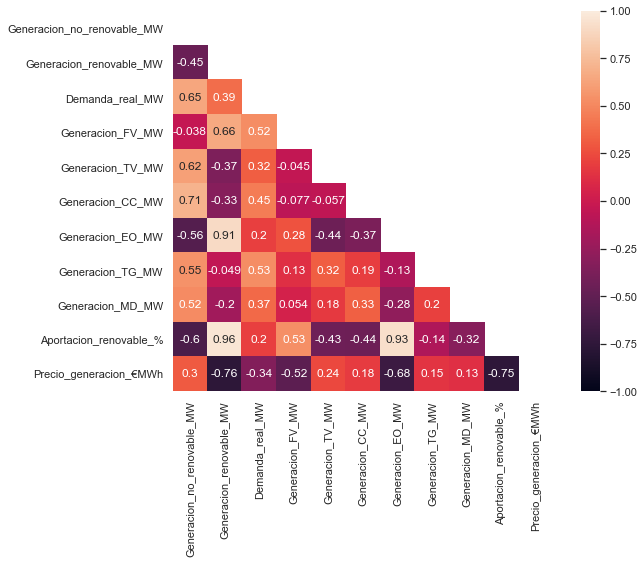

In [313]:
# Ploting the Electrical Real Time variables.
corrmat = df_RT.corr()
# Draw the heatmap using seaborn

# Quitar valores repetidos
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,7))
sns.heatmap(corrmat, vmin=-1, vmax=1, square=True, annot=True, mask=mask)

In [314]:
#Correlación con la variable de salida
cor_target = abs(corrmat["Precio_generacion_€MWh"])

#Seleccionamos los atributos con mayor correlación
relevant_features = cor_target[cor_target>0.3]
relevant_features

Generacion_no_renovable_MW    0.304913
Generacion_renovable_MW       0.762788
Demanda_real_MW               0.338105
Generacion_FV_MW              0.518843
Generacion_EO_MW              0.681781
Aportacion_renovable_%        0.751612
Precio_generacion_€MWh        1.000000
Name: Precio_generacion_€MWh, dtype: float64

Como se puede ver, solo los atributos mostrados en pantalla son variables relevantes, de modo que eliminaremos todos los otros atributos para no confundir al modelo. Sin embargo, este no es el final de proceso. Una de las premisas de las regresiones lineales es que las variables independientes no deben estar correlacionadas entre sí, si lo están tendremos que quedarnos solo con una de ella y descartar las demás. 

In [315]:
indexes=[]

for i in range(0,len(df_RT.columns)):
    for j in range (0,len(relevant_features.index)):
        if relevant_features.index[j]==df_RT.columns[i]:
            indexes.append(i)

df_RT_f = pd.DataFrame(df_RT.iloc[:,indexes], columns=df_RT.columns[indexes])

# Función para ver solo una mitad de la matriz
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_RT_f, 10))

Top Absolute Correlations
Generacion_renovable_MW     Aportacion_renovable_%    0.964014
Generacion_EO_MW            Aportacion_renovable_%    0.929803
Generacion_renovable_MW     Generacion_EO_MW          0.906539
                            Precio_generacion_€MWh    0.762788
Aportacion_renovable_%      Precio_generacion_€MWh    0.751612
Generacion_EO_MW            Precio_generacion_€MWh    0.681781
Generacion_renovable_MW     Generacion_FV_MW          0.657457
Generacion_no_renovable_MW  Demanda_real_MW           0.645843
                            Aportacion_renovable_%    0.604992
                            Generacion_EO_MW          0.558563
dtype: float64


Se decide eliminar 'Generacion_renovable_MW' y 'Aportacion_renovable_%' pues estos atributos están fuertemente relacionados entre sí y entre otros atributos como la generación eólica.

In [316]:
df_RT_f=df_RT_f.drop(['Generacion_renovable_MW','Aportacion_renovable_%'],axis=1)
df_RT_f

,Generacion_no_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_EO_MW,Precio_generacion_€MWh
2019-01-01 00:00:00,347.6,347.6,0.0,0.0,156.18
2019-01-01 00:10:00,345.0,345.0,0.0,0.0,156.18
2019-01-01 00:20:00,346.9,347.0,0.0,0.1,156.18
2019-01-01 00:30:00,344.5,344.7,0.0,0.2,156.18
2019-01-01 00:40:00,342.9,343.0,0.0,0.1,156.18
...,...,...,...,...,...
2019-12-31 23:10:00,371.4,373.7,0.0,2.3,140.89
2019-12-31 23:20:00,368.0,370.4,0.0,2.4,140.89
2019-12-31 23:30:00,362.6,365.3,0.0,2.7,140.89
2019-12-31 23:40:00,355.2,360.2,0.0,5.0,140.89


Finalmente nos quedamos con los siguientes atributos:

- Generacion_EO_MW
- Generacion_FV_MW
- Demanda_real_MW
- Generacion_no_renovable_MW

### **4.2 Day-Ahead Features**

#### ¿Which method?

## **5. Linear Regression Models**

La regresión lineal es probablemente una de las más importantes y ampliamente usadas técnicas de regresión. Está entre los métodos de regresión más simples. Una de sus principales ventajas es la facilidad de interpretar sus resultados. ( Mirko Stojiljković, Real Python, 07/02/21)


### **5.1 Real Time Features**
#### OLS Model

El primer modelo que se plantea es el modelo de regresión lineal simple (OLS). Se trata del modelo de machine learning más sencillo de todos, pero es la base para después desarrollar modelos más complejos y precisos. El OLS tiene como objetivo encontrar la relación que existe entre una variable independiente y una variable contínua dependiente (target).

En primer lugar se visualizan las variables independientes frente a la variable de salida. De este modo se puede intuir fácilmente que variable puede describir mejor el comportamiento de nuestro target.

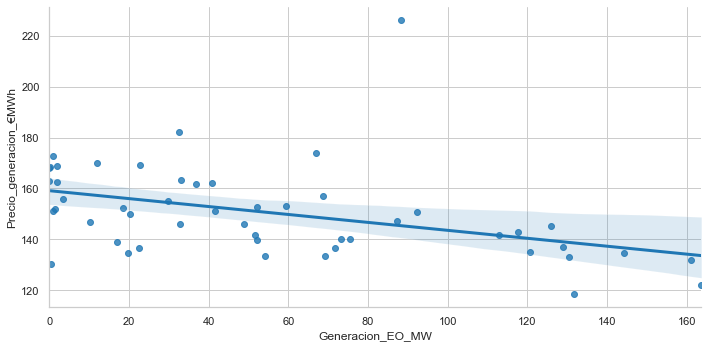

In [317]:
#seaborn set style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
%matplotlib inline 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

sns.lmplot("Generacion_EO_MW", "Precio_generacion_€MWh", df_RT.sample(50), aspect=2)

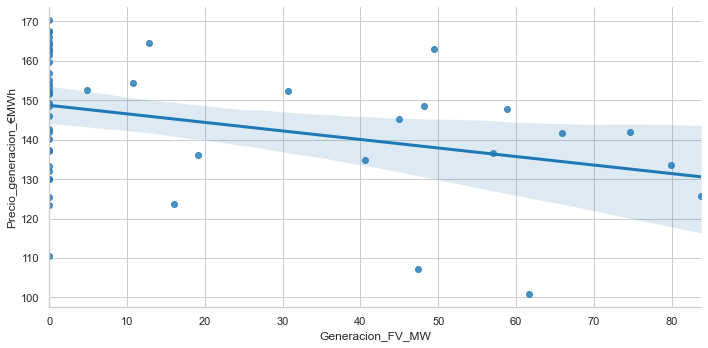

In [318]:
sns.lmplot("Generacion_FV_MW", "Precio_generacion_€MWh", df_RT.sample(50), aspect=2)

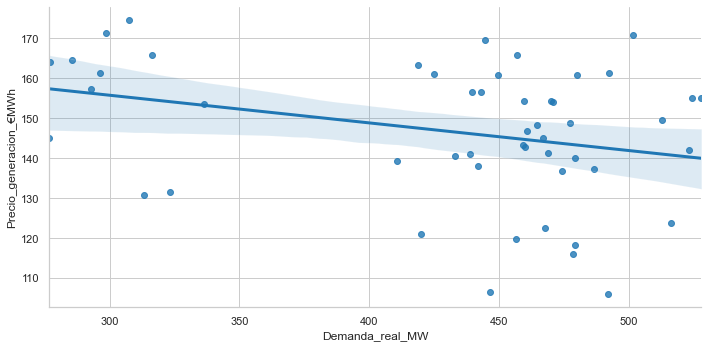

In [319]:
sns.lmplot("Demanda_real_MW", "Precio_generacion_€MWh", df_RT.sample(50), aspect=2)

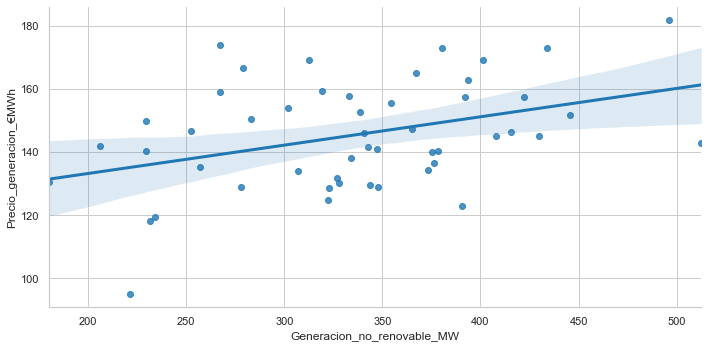

In [320]:
sns.lmplot("Generacion_no_renovable_MW", "Precio_generacion_€MWh", df_RT.sample(50), aspect=2)

In [321]:
from sklearn.model_selection import train_test_split

# 75% de datos para entrenar, 25% para testear
train, test = train_test_split(df_RT_f,test_size=0.25,random_state=40)

In [322]:
train.describe()

,Generacion_no_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_EO_MW,Precio_generacion_€MWh
count,39391.000000,39391.000000,39391.000000,39391.000000,39391.000000
mean,330.440258,409.294623,21.748719,57.105651,147.544094
std,82.041858,79.122707,29.930521,53.372587,18.854599
min,91.000000,179.600000,-3.000000,0.000000,92.190000
25%,273.200000,329.000000,0.000000,6.500000,134.120000
50%,324.400000,431.500000,0.000000,41.400000,147.580000
75%,393.500000,477.100000,43.800000,102.200000,160.780000
max,550.900000,570.700000,99.800000,181.900000,370.480000


In [323]:
# Podemos ver las features y la columna target
feature_vars = train.drop(['Precio_generacion_€MWh'],axis=1)
target_vars = train[['Precio_generacion_€MWh']]

#Split training dataset 
train_X = train[feature_vars.columns] #[['Generacion_EO_MW','Generacion_FV_MW','Demanda_real_MW','Generacion_no_renovable_MW']]
train_y = train[target_vars.columns] #['Precio_generacion_€MWh']

#Split test dataset
test_X = test[feature_vars.columns] #[['Generacion_EO_MW','Generacion_FV_MW','Demanda_real_MW','Generacion_no_renovable_MW']]
test_y = test[target_vars.columns] #['Precio_generacion_€MWh']

print('Train and test sizes {} {}'.format(train_X.shape, test_X.shape))

Train and test sizes (39391, 4) (13131, 4)


In [324]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Score using a single feature
regr_OLS = LinearRegression()
for i in np.arange(len(train_X.columns)):
    feat1=train_X.iloc[:,i:i+1]
    regr_OLS.fit(feat1, train_y)    
    print('Feature: {}'.format(train_X.columns[i]))
    print('Score: {}'.format(regr_OLS.score(feat1, train_y)))

Feature: Generacion_no_renovable_MW
Score: 0.09366848348539603
Feature: Demanda_real_MW
Score: 0.11371319602277274
Feature: Generacion_FV_MW
Score: 0.26885582303800093
Feature: Generacion_EO_MW
Score: 0.46183204861082383


Se puede observar que el mejor predictor es la variable 'Generacion_EO_MW', coincidiendo con el atributo que mayor índice de correlación presenta con la variable de salida según la matriz de pearson.

Analizando los gráficos, se observa que la relación entre la generación eólica y el precio de generación presenta una menor dispersión y mayor uniformidad a lo largo del eje x-y.

#### MLR Model

A continuación se van a utilizar modelos de regresión lineal múltiples para ver si mejora la predicción. Estos modelos consideran todas las variables independientes (predictores) seleccionadas y suelen tener un ínidice de acierto mayor.  

In [325]:
regr_MLR = LinearRegression()  # Creamos regresión lineal
regr_MLR.fit(train_X, train_y) # fitting
print('Coeff and intercept: {} {}'.format(regr_MLR.coef_[0], regr_MLR.intercept_[0]))

# Evaluamos
print('Training Score: {}'.format(regr_MLR.score(train_X, train_y)))
print('Testing Score: {}'.format(regr_MLR.score(test_X, test_y)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_MLR.predict(train_X) - train_y)**2)))
print('Testing MSE: {}'.format(np.mean((regr_MLR.predict(test_X) - test_y)**2)))


Coeff and intercept: [ 62.66574475 -62.6771507   62.4560233   62.46166891] 168.42722668223868
Training Score: 0.5813704789506565
Testing Score: 0.5924791290957263
Training MSE: Precio_generacion_€MWh    148.817308
dtype: float64
Testing MSE: Precio_generacion_€MWh    140.728667
dtype: float64


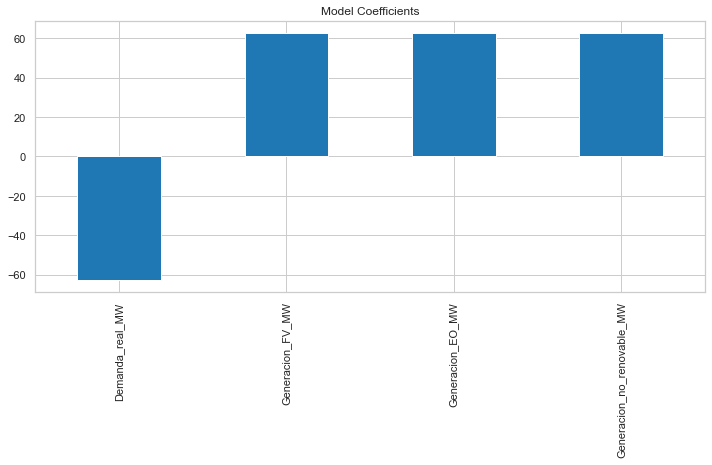

In [326]:
from pandas import Series
coef = Series(regr_MLR.coef_[0], train_X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [327]:
regr_ridge = linear_model.Ridge(alpha=.3) # Create a Ridge regressor
regr_ridge.fit(train_X, train_y)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(regr_ridge.coef_[0],  regr_ridge.intercept_[0]))

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse
print('Training Score: {}'.format(regr_ridge.score(train_X, train_y)))
print('Testing Score: {}'.format(regr_ridge.score(test_X, test_y)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_ridge.predict(train_X) - train_y)**2)))
print('Test MSE: {}'.format(np.mean((regr_ridge.predict(test_X) - test_y)**2)))

Coeff and intercept: [ 1.12604955 -1.13746173  0.91633141  0.92196917] 168.43027449234006
Training Score: 0.5813650710124934
Testing Score: 0.5924583538323247
Training MSE: Precio_generacion_€MWh    148.81923
dtype: float64
Test MSE: Precio_generacion_€MWh    140.735842
dtype: float64


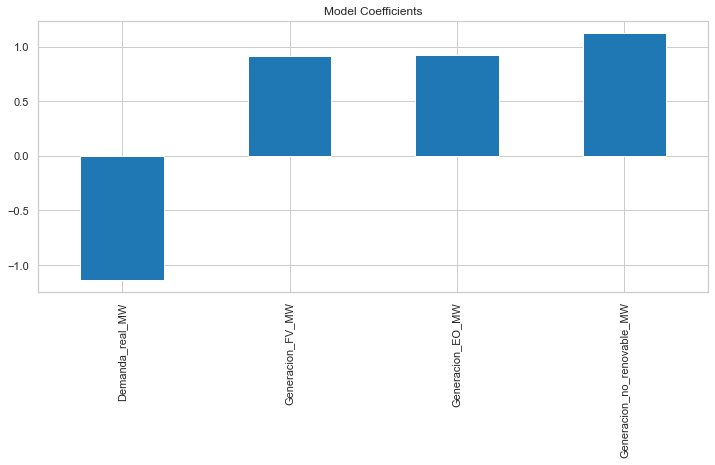

In [328]:
coef = Series(regr_ridge.coef_[0], train_X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [329]:
regr_lasso = linear_model.Lasso(alpha=.3) # Create a Lasso regressor
regr_lasso.fit(train_X, train_y)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(regr_lasso.coef_,  regr_lasso.intercept_[0]))

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse
print('Training Score: {}'.format(regr_lasso.score(train_X, train_y)))
print('Testing Score: {}'.format(regr_lasso.score(test_X, test_y)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_lasso.predict(train_X) - train_y.iloc[:,0])**2)))
print('Test MSE: {}'.format(np.mean((regr_lasso.predict(test_X) - test_y.iloc[:,0])**2)))

# Are the coeficients now sparse?
# Is the score different?

Coeff and intercept: [ 0.09725119 -0.10869128 -0.11212357 -0.10676926] 168.43081461890225
Training Score: 0.5813645725947906
Testing Score: 0.5924564216659371
Training MSE: 148.8194073444574
Test MSE: 140.73650878319657


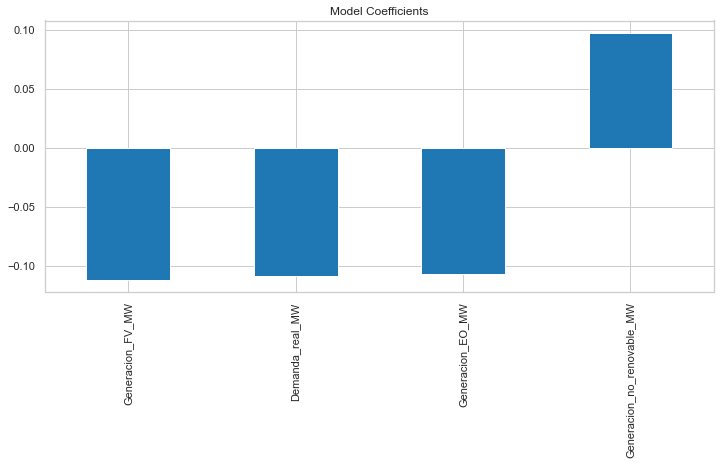

In [330]:
coef = Series(regr_lasso.coef_, train_X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

La evaluación de nuestro modelo de regresión lineal múltiple MLR no se ve alterada tras la regularización Ridge y/o Lasso. Esto nos indica que el modelo no presenta problemas de overfitting y que el proceso de feature selection ha sido exitoso, eliminando las variables irrelevantes y aquellas correlacionadas entre sí ( Jose Martinez Heras, iartifical.net).

Sería interesante hacer la comparación si utilizamos el dataset real time completo. Se ha comprobado y en realidad sale mejor modelo si no hacemos el featuring selection.... con estos resultados:

- Training Score: 0.6409808199907399
- Testing Score: 0.6544826513524737
- Training MSE: Precio_generacion_€MWh 127.626613 dtype: float64
- Testing MSE: Precio_generacion_€MWh 119.317069 dtype: float64

Tampoco se observa mejora en el modelo tras la regularización Ridge y/o Lasso.

#### Polynomial Regression Model

Por último, se puede considerar una dependencia polinómica entre los inputs (predictores) y el output y, calcular la función de regresión polinómica estimada que minimiza el error entre las predicciones y los valores reales para el subset de datos de entreno.

Hay que vigilar en los modelos de regresión polinómicos ya que hay que escoger el grado óptimo de regresión polinómica para evitar problemas de underfitting u overfitting.


In [331]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [332]:
#regr_Poly = PolynomialFeatures(degree=2, include_bias=False) #Create a polynomial regressor
#regr_Poly.fit(train_X) #Perform de fitting

train_X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(train_X) #Modifying the input variables
test_X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(test_X) #Modifying the input variables
regr_poly = LinearRegression().fit(train_X_poly, train_y) #fitting
print('Coeff and intercept: {} {}'.format(regr_poly.coef_,  regr_poly.intercept_[0]))

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse
print('Training Score: {}'.format(regr_poly.score(train_X_poly, train_y)))
print('Testing Score: {}'.format(regr_poly.score(test_X_poly, test_y)))
# Compute MSE for training and testing sets 
#print('Training MSE: {}'.format(np.mean((regr_poly.predict(train_X_poly) - train_y.iloc[:,0])**2)))
#print('Test MSE: {}'.format(np.mean((regr_poly.predict(test_X_poly) - test_y.iloc[:,0])**2)))



Coeff and intercept: [[    814.87209135    -814.98148228     814.41512738     814.44352134
   274808.2301747  -549715.79960076   61495.3160658   549642.96357062
   274907.56951525  -61594.65485823 -549742.30228412 -213312.9143178
    61521.81976766  274834.73331364]] 193.53284860873063
Training Score: 0.605010131581874
Testing Score: 0.6152444704943637


La regresión lineal a veces no es apropiada, especialmente para modelos no lineales de alta complejidad. En este caso hemos conseguido un score de 0.615 cuando usamos un modelo de regresión lineal polinómico de segundo grado.

Por suerte, existen otros métodos de regresión que podemos utilizar cuando los modelos de regresión lineal no funcionan correctamente. Algunos de ellos son: support vector machines, decission trees, random forest, and neural networks.



#### Escalar variables

In [333]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(train_X) #

#train_y2 = np.expand_dims(train_y, axis=1) # Expand the shape of the array from (253,) to (253, 1).
scalery = StandardScaler().fit(train_y) # Create the transformer StandardScaler and perform the fitting for the target

print("\nBefore transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(train_y.iloc[:,0]), np.min(train_y.iloc[:,0]), np.mean(train_y.iloc[:,0]), np.var(train_y.iloc[:,0])))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(test_y.iloc[:,0]), np.min(test_y.iloc[:,0]), np.mean(test_y.iloc[:,0]), np.var(test_y.iloc[:,0])))


# Normalization of train and test data using mean and variance of the training:
train_X = scalerX.transform(train_X)
train_y = scalery.transform(train_y)
test_X = scalerX.transform(test_X)
#test_y2 = np.expand_dims(test_y, axis=1)
test_y = scalery.transform(test_y)

print("\nAfter transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(train_y), np.min(train_y), np.mean(train_y), np.var(train_y)))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(test_y), np.min(test_y), np.mean(test_y), np.var(test_y)))


Before transformation:
Training: Max 370.48, min 92.19, mean 147.5440943362685, and var 355.48689289597314
Testing: Max 292.71, min 92.19, mean 147.83442997486875, and var 345.32873602987905

After transformation:
Training: Max 11.824103553354766, min -2.9358776532007727, mean 6.448656496007611e-16, and var 1.0
Testing: Max 7.699328180780024, min -2.9358776532007727, mean 0.015398859352882304, and var 0.9714246655246744


In [334]:
train_X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(train_X) #Modifying the input variables
test_X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(test_X) #Modifying the input variables
regr_poly = LinearRegression().fit(train_X_poly, train_y) #fitting
print('Coeff and intercept: {} {}'.format(regr_poly.coef_,  regr_poly.intercept_[0]))

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse
print('Training Score: {}'.format(regr_poly.score(train_X_poly, train_y)))
print('Testing Score: {}'.format(regr_poly.score(test_X_poly, test_y)))
# Compute MSE for training and testing sets 
#print('Training MSE: {}'.format(np.mean((regr_poly.predict(train_X_poly) - train_y.iloc[:,0])**2)))
#print('Test MSE: {}'.format(np.mean((regr_poly.predict(test_X_poly) - test_y.iloc[:,0])**2)))

Coeff and intercept: [[-4.18861116e+12  4.03957490e+12 -1.52808956e+12 -2.72491402e+12
  -4.74398994e+12  4.63699100e+12 -1.56399633e+12 -4.68920183e+12
  -5.95992527e+10 -1.38229890e+11  1.58615109e+12  6.08179660e+10
  -4.76349375e+11 -1.04282647e+12]] -259222.78173828125
Training Score: 0.6049460333131638
Testing Score: -8046656608162.948


### **5.2 Day-Ahead Features**

#### ¿Which method?

## **6. Other Regression Models**

En este apartado se van a probar otros modelos de regresión que suelen ser más efectivos en modelos no lineales de alta complejidad. 

Para realizar la comparación de estos modelos con los modelos de regresión lineal se va a partir del dataset origen, con toda la información disponible ya que tras el featuring selection se puede haber perdido información útil para estos modelos más complejos. Así mismo, se incluyen atributos temporales que tal vez favorecen a la predicción de los modelos.

Si los resultados no son los esperados, siempre se puede manipular el dataset, limitar algunos datos, y volver a entrenar los modelos.

Probaremos los siguientes modelos:

    1.Support vector regression 

    2.KNeighborsRegressor

    3.Random Forest Regressor

    4.Gradient Boosting Regressor

    5.ExtraTrees Regressor

    6.Multi Layer Preceptron Regressor


### **5.1 Real Time Features**

In [335]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR


In [336]:
#Eliminamos la variable 'Aportación_renovable_%' por estar altamente correlacionada con otra variable de entrada
df_RT=df_RT.drop(['Aportacion_renovable_%'], axis=1)

In [337]:
#Incluímos las variables temporales que mayor impacto tienen en el precio de generación según el EDA
df_RT['Mes']=df_ML['Month']
df_RT['Hora']=df_ML['Hour']
#df_RT['Minuto']=df_ML['Minute']
df_RT['Dia']=df_ML['Weekday']

df_RT['Estacion']=df_ML['Season_i']
#df_RT['Invierno']=df_ML['Season_Invierno']
#df_RT['Primavera']=df_ML['Season_Primavera']
#df_RT['Verano']=df_ML['Season_Verano']
#df_RT['Otoño']=df_ML['Season_Otoño']
#Con el One Hot Encoding algunos modelos mejoran y otros empeoran aunque la diferencia es mínima y el tiempo de computo 
#aumenta mucho por lo que se decide dejar el label encoding

Tras hacer varias pruebas y contrariamente a lo esperado, se observa que la inclusión de la variable 'día de la semana' afecta positivamente al entreno de los modelos y mejora la predicción de todos ellos.

In [338]:
# 75% de datos para entrenar, 25% para testear
train, test = train_test_split(df_RT,test_size=0.25,random_state=40)
train.describe()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Precio_generacion_€MWh,Mes,Hora,Dia,Estacion
count,39391.000000,39391.00000,39391.000000,39391.000000,39391.000000,39391.000000,39391.000000,39391.000000,39391.000000,39391.000000,39391.000000,39391.000000,39391.000000,39391.000000
mean,330.440258,78.85437,409.294623,21.748719,123.520858,173.622909,57.105651,11.907301,21.389193,147.544094,6.525958,11.508365,3.990074,1.504557
std,82.041858,68.05495,79.122707,29.930521,45.379873,52.689178,53.372587,17.555855,13.826444,18.854599,3.443768,6.915419,1.996272,1.127974
min,91.000000,0.00000,179.600000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.190000,1.000000,0.000000,1.000000,0.000000
25%,273.200000,16.70000,329.000000,0.000000,93.000000,143.500000,6.500000,0.000000,14.700000,134.120000,4.000000,6.000000,2.000000,0.000000
50%,324.400000,64.80000,431.500000,0.000000,122.700000,163.200000,41.400000,0.000000,18.800000,147.580000,7.000000,12.000000,4.000000,2.000000
75%,393.500000,128.20000,477.100000,43.800000,162.000000,202.000000,102.200000,20.700000,34.900000,160.780000,10.000000,18.000000,6.000000,3.000000
max,550.900000,265.60000,570.700000,99.800000,211.700000,394.300000,181.900000,200.700000,40.600000,370.480000,12.000000,23.000000,7.000000,3.000000


In [339]:
# Podemos ver las features y la columna target
feature_vars = train.drop(['Precio_generacion_€MWh'],axis=1)
target_vars = train[['Precio_generacion_€MWh']]

#Split training dataset 
train_X = train[feature_vars.columns] #[['Generacion_EO_MW','Generacion_FV_MW','Demanda_real_MW','Generacion_no_renovable_MW']]
train_y = train[target_vars.columns] #['Precio_generacion_€MWh']

#Split test dataset
test_X = test[feature_vars.columns] #[['Generacion_EO_MW','Generacion_FV_MW','Demanda_real_MW','Generacion_no_renovable_MW']]
test_y = test[target_vars.columns] #['Precio_generacion_€MWh']

print('Train and test sizes {} {}'.format(train_X.shape, test_X.shape))

Train and test sizes (39391, 13) (13131, 13)


In [340]:
#Escalado de variables. Algunos modelos no trabajan bien si las variables no están escaladas.
scalerX = StandardScaler().fit(train_X) #

#train_y2 = np.expand_dims(train_y, axis=1) # Expand the shape of the array from (253,) to (253, 1).
scalery = StandardScaler().fit(train_y) # Create the transformer StandardScaler and perform the fitting for the target

print("\nBefore transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(train_y.iloc[:,0]), np.min(train_y.iloc[:,0]), np.mean(train_y.iloc[:,0]), np.var(train_y.iloc[:,0])))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(test_y.iloc[:,0]), np.min(test_y.iloc[:,0]), np.mean(test_y.iloc[:,0]), np.var(test_y.iloc[:,0])))


# Normalization of train and test data using mean and variance of the training:
train_X = scalerX.transform(train_X)
train_y = scalery.transform(train_y)
test_X = scalerX.transform(test_X)
#test_y2 = np.expand_dims(test_y, axis=1)
test_y = scalery.transform(test_y)

print("\nAfter transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(train_y), np.min(train_y), np.mean(train_y), np.var(train_y)))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(test_y), np.min(test_y), np.mean(test_y), np.var(test_y)))


Before transformation:
Training: Max 370.48, min 92.19, mean 147.5440943362685, and var 355.48689289597314
Testing: Max 292.71, min 92.19, mean 147.83442997486875, and var 345.32873602987905

After transformation:
Training: Max 11.824103553354766, min -2.9358776532007727, mean 6.448656496007611e-16, and var 1.0
Testing: Max 7.699328180780024, min -2.9358776532007727, mean 0.015398859352882304, and var 0.9714246655246744


In [341]:
# Lista de modelos a probar
models = [
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]


In [342]:
# Correr los modelos
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

C:\Users\Mini\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-342-76c819a5a2d3>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  curr_model.fit(train_X,train_y)
<ipython-input-342-76c819a5a2d3>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  curr_model.fit(train_X,train_y)
C:\Users\Mini\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mini\anaconda3\lib\site-packages\skle

In [345]:
# Pasar a datframe
df_model = pd.DataFrame(model_data)
df_model

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,KNeighborsRegressor:,0.932661,0.927267,0.882524,0.337815
1,SVR:,66.528147,0.737709,0.750732,0.492082
2,RandomForest,41.532444,0.978059,0.860847,0.367664
3,ExtraTreeRegressor :,18.287966,1.000000,0.914375,0.288406
4,GradientBoostingClassifier:,9.551772,0.754354,0.752633,0.490203
5,XGBRegressor:,3.266316,0.923817,0.827125,0.409799
6,MLPRegressor:,13.910862,0.745751,0.746883,0.495867


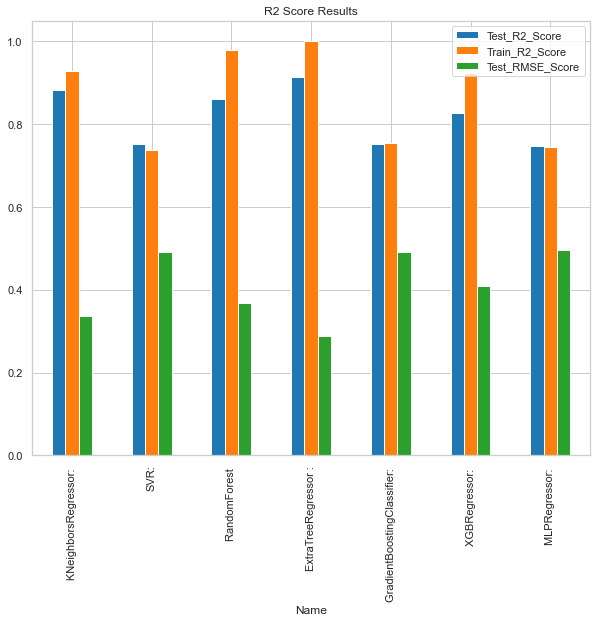

In [346]:
df_model.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

#### Obervaciones

1. Mejor modelo Extra Tree Regressor con R2 score 0.91
2. Menor RMSE score también Extra Tree Regressor 0.29
3. SVR y MLPR los peores!
4. Extra Tree Regressor tiene un training R2 score 1.0 (overfitting?)

#### Configurar parámetros

In [347]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Inizializar
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 36.4min finished
C:\Users\Mini\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [348]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 250}

In [349]:
# Mejores parámetros para ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, n_estimators=250, random_state=40)

In [350]:
# Evaluamos
print('Training Score: {}'.format(grid_search.best_estimator_.score(train_X,train_y)))
print('Testing Score: {}'.format(grid_search.best_estimator_.score(test_X,test_y)))
# Compute MSE for training and testing sets 
print('Testing MSE: {}'.format(np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))))

Training Score: 1.0
Testing Score: 0.9156265479250734
Testing MSE: 0.28629085291194295


Ha tardado muchísimo en ejecutar y no se ha conseguido mejorar prácticamente, no se si habría que probar con otros parámetros o con otro modelo... A debatir con Íngrid. De momento voy a analizar el modelo KNeighbors Regressor

In [357]:
param_grid = [{
              'n_neighbors': [2,3,4,5,6],
              'weights' : ['uniform','distance'],
              'algorithm' : ['auto','ball_tree']
            }]
reg = neighbors.KNeighborsRegressor()
# Inizializar
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree'],
                          'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='r2', verbose=2)

In [358]:
# Tuned parameter set
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}

In [359]:
# Mejores parámetros para ExtraTreesRegressor
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=2, weights='distance')

In [360]:
# Evaluamos
print('Training Score: {}'.format(grid_search.best_estimator_.score(train_X,train_y)))
print('Testing Score: {}'.format(grid_search.best_estimator_.score(test_X,test_y)))
# Compute MSE for training and testing sets 
print('Testing MSE: {}'.format(np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))))

Training Score: 1.0
Testing Score: 0.9229912654321788
Testing MSE: 0.27351084845033863


### **5.2 Day-Ahead Features**

¿Which method?